In [3]:
# ==============================
# Email Spam Classification - Google Colab Version
# ==============================

# Import libraries
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Upload dataset
from google.colab import files
uploaded = files.upload()  # Click 'Choose Files' and select your spam.csv

# Load dataset
data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']
data['label_num'] = data.label.map({'ham': 0, 'spam': 1})

# Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\S+@\S+', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text.strip()

data['clean_message'] = data['message'].apply(preprocess_text)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    data['clean_message'], data['label_num'], test_size=0.2, random_state=42
)

# Feature extraction
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Evaluate model
y_pred = model.predict(X_test_tfidf)
print("\nModel Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Test new emails
sample_emails = [
    "Congratulations! You won a $500 gift card. Click to claim now.",
    "Hey, are we still meeting for lunch tomorrow?",
    "URGENT: Your account has been compromised. Login to secure it immediately."
]

sample_emails_clean = [preprocess_text(email) for email in sample_emails]
sample_tfidf = vectorizer.transform(sample_emails_clean)
predictions = model.predict(sample_tfidf)

print("\nSample Email Predictions")
for email, pred in zip(sample_emails, predictions):
    label = 'Spam' if pred == 1 else 'Not Spam'
    print(f"Email: \"{email}\"\nPrediction: {label}\n")


Saving spam.csv to spam.csv

Model Evaluation
Accuracy: 0.00%
Confusion Matrix:
 [[0 0]
 [1 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0


Sample Email Predictions
Email: "Congratulations! You won a $500 gift card. Click to claim now."
Prediction: Spam

Email: "Hey, are we still meeting for lunch tomorrow?"
Prediction: Not Spam

Email: "URGENT: Your account has been compromised. Login to secure it immediately."
Prediction: Not Spam



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8721 - loss: 0.4389 - val_accuracy: 0.9687 - val_loss: 0.1107
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9658 - loss: 0.1128 - val_accuracy: 0.9715 - val_loss: 0.0917
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9776 - loss: 0.0726 - val_accuracy: 0.9767 - val_loss: 0.0761
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9835 - loss: 0.0533 - val_accuracy: 0.9745 - val_loss: 0.0892
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9865 - loss: 0.0431 - val_accuracy: 0.9773 - val_loss: 0.0814
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9892 - loss: 0.0342 - val_accuracy: 0.9765 - val_loss: 0.0892
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9917 - loss: 0.0255 - val_accuracy: 0.9822 - val_loss: 0.0719
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9935 - loss: 0.0192 - 

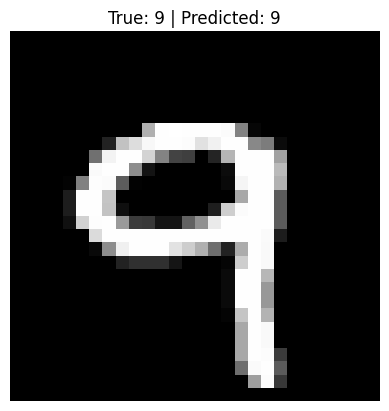

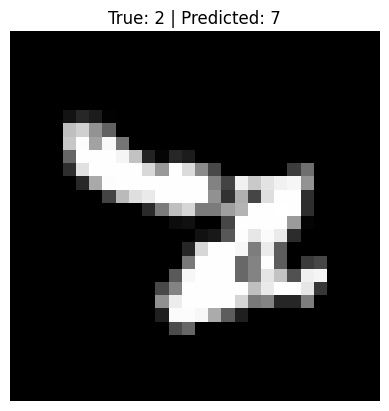

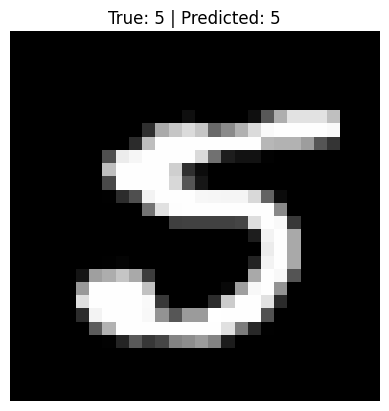

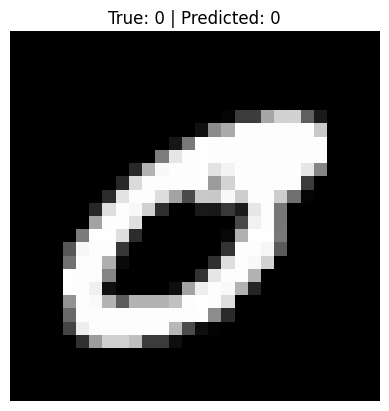

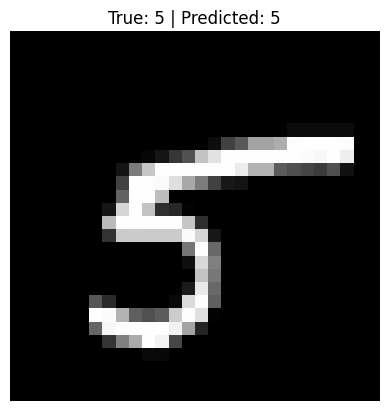

In [4]:


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix


(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to [0,1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert labels to one-hot encoding
y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)


model = Sequential([
    Flatten(input_shape=(28,28)),        # Flatten 28x28 images to 1D
    Dense(128, activation='relu'),       # Hidden layer with 128 neurons
    Dense(64, activation='relu'),        # Another hidden layer
    Dense(10, activation='softmax')      # Output layer: 10 classes (0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train_cat, epochs=10, batch_size=32, validation_split=0.1)

test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

# Predict labels for test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion matrix and classification report
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))

num_samples = 5
indices = np.random.choice(len(X_test), num_samples, replace=False)

for i, idx in enumerate(indices):
    plt.imshow(X_test[idx], cmap='gray')
    plt.title(f"True: {y_test[idx]} | Predicted: {y_pred_classes[idx]}")
    plt.axis('off')
    plt.show()
